In [6]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
excel_path_and_filename = "../../../Downloads/SMEs_Scopus_2013-2017.xlsx"
df = pd.read_excel(excel_path_and_filename)

In [10]:
df.columns


Index(['Authors', 'Title', 'Year', 'Source title', 'Volume', 'Issue',
       'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by', 'DOI',
       'Link', 'Affiliations', 'Authors with affiliations', 'Abstract',
       'Author Keywords', 'Index Keywords', 'Correspondence Address',
       'Editors', 'Publisher', 'ISSN', 'ISBN', 'CODEN', 'PubMed ID',
       'Language of Original Document', 'Abbreviated Source Title',
       'Document Type', 'Access Type', 'Source', 'EID', 'Unnamed: 31'],
      dtype='object')

In [83]:
# 이걸 각 시트별로 내용을 쭉쭉 넣으면 되지 않을까?
import itertools
from collections import Counter
from inflection import singularize 
from textblob import TextBlob

def make_simple_report(input_df):
    def total_kwd_count():
        auth_kwds = input_df['Author Keywords'].fillna("").copy()
        auth_kwds = map(lambda s: s.strip(), auth_kwds)
        auth_kwds = map(lambda s: s.split(";"), auth_kwds)
        auth_kwds = filter(lambda s: True if s!="" else False, itertools.chain.from_iterable(auth_kwds))
        auth_kwds = map(lambda s: s.strip().lower(), auth_kwds)
        auth_kwds = map(lambda s: singularize(s), auth_kwds)
        # not ignore '-' or '.' and so on. 
        auth_kwds = pd.DataFrame(Counter(auth_kwds).most_common(), columns=["author kwd", "count"])
        return auth_kwds
    def total_noun_count_from_abstract():
        nouns = input_df['Abstract'].dropna().copy()
        nouns = (TextBlob(abstract).noun_phrases for abstract in nouns)
        nouns = itertools.chain.from_iterable(nouns)
        nouns = map(lambda s: singularize(s), nouns)
        nouns = pd.DataFrame(Counter(nouns).most_common(), columns=['noun from abstract', 'count'])
        return nouns
    def yearly_kwd_count_n(n=20):
        years = sorted(list(set(input_df['Year'])))
        yearly_kwds_df = {}
        for year in years:
            year_auth_kwds = input_df[input_df['Year']==year]['Author Keywords'].dropna().copy()
            year_auth_kwds = map(lambda s: s.strip(), year_auth_kwds)
            year_auth_kwds = map(lambda s: s.split(";"), year_auth_kwds)
            year_auth_kwds = itertools.chain.from_iterable(year_auth_kwds)
            year_auth_kwds = map(lambda s: singularize(s.strip().lower()), year_auth_kwds)
            year_auth_kwds = [k for k, v in Counter(year_auth_kwds).most_common(n)]
            if len(year_auth_kwds) < n:
                for i in range(0, n - len(year_auth_kwds)):
                    year_auth_kwds.append("")
            yearly_kwds_df[year]=year_auth_kwds
        return pd.DataFrame(yearly_kwds_df)
        
    writer = pd.ExcelWriter('simple_report_for_SME.xlsx')
    total_kwd_count().to_excel(writer, "전체 키워드 빈도 순위")
    total_noun_count_from_abstract().to_excel(writer, '초록에서 뽑아낸 명사 빈도 순위')
    yearly_kwd_count_n(20).to_excel(writer, '연도별 저자 키워드 빈도 순위 변화')
    writer.save()
    
make_simple_report(df[:1000].copy())

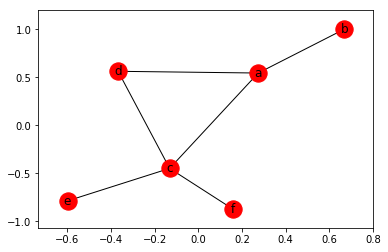

{'a': 0.3928571428571428,
 'b': 0.21428571428571425,
 'c': 0.6785714285714285,
 'd': 0.14285714285714285,
 'e': 0.24999999999999997,
 'f': 0.3214285714285714}

In [97]:
import networkx as nx

nx.draw_networkx(G1)
plt.show()

G1 = nx.Graph()
G1.add_edge('a', 'b', weight=0.6)
G1.add_edge('a', 'c', weight=0.2)
G1.add_edge('c', 'd', weight=0.1)
G1.add_edge('c', 'e', weight=0.7)
G1.add_edge('c', 'f', weight=0.9)
G1.add_edge('a', 'd', weight=0.3)

G2 = nx.Graph()
G2.add_edge('a', 'b', weight=1.0)
G2.add_edge('a', 'c', weight=1.0)
G2.add_edge('c', 'd', weight=1.0)
G2.add_edge('c', 'e', weight=1.0)
G2.add_edge('c', 'f', weight=1.0)
G2.add_edge('a', 'd', weight=1.0)

nx.degree_centrality(G1)
nx.degree_centrality(G2)

def weighted_degree_centrality(input_G, normalized=False):
    centrality={}
    weighted_sum = [ edge[2]['weight'] for edge in G.edges(data=True) ]
    weighted_sum = sum(weighted_sum)
    for node1 in G.nodes():
        weighted_degree = 0
        if normalized==False:
            for node2 in G.nodes():
                try:
                    weighted_degree+=G[node1][node2]['weight']
                except:
                    continue
        else:
            for node2 in G.nodes():
                try:
                    weighted_degree+=G[node1][node2]['weight']/weighted_sum
                except:
                    continue
        centrality[node1]=weighted_degree
    return centrality
weighted_degree_centrality(G2, True)
